In [ ]:
import pandas as pd #to create and manipulate ds
import numpy as np  #enables to work with arrays and matrices
import seaborn as sns #data visual statistical graphs
import matplotlib.pyplot as plt #plotting
import warnings #ignore warning which arise while implementing ML alg
warnings.filterwarnings('ignore')

In [ ]:
import re  #to work with regular exp
import nltk  #for txt analysis
import string
#import nlp_utils
#import contractins #text manipulatio(expanding the shortcut words)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer , SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
set(stopwords.words('english'))

Importing Dataset

In [ ]:
data = pd.read_csv('/content/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
data.toxic.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: toxic, dtype: float64

In [ ]:
data_count=data.iloc[:,2:].sum()

In [ ]:
data_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

Text Preprocessing

In [ ]:
alphanumeric = lambda x : re.sub('\w*\d\w*',' ',x)
punc_lower = lambda x : re.sub('[%s]' % re.escape(string.punctuation),' ',x.lower())
remove_n = lambda x : re.sub("\n"," ",x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ',x)
data['comment_text'] = data['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)



In [ ]:
data_tox = data.loc[:,['id','comment_text','toxic']]
data_sev = data.loc[:,['id','comment_text','severe_toxic']]
data_obs = data.loc[:,['id','comment_text','obscene']]
data_thr = data.loc[:,['id','comment_text','threat']]
data_ins = data.loc[:,['id','comment_text','insult']]
data_ide = data.loc[:,['id','comment_text','identity_hate']]

In [ ]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords

Representation in Wordcloud

In [ ]:
from pandas.core.common import random_state
def wordcloud(df , label):
  subset = df[df[label]==1]
  text = subset.comment_text.values
  wc = WordCloud(background_color = "black",max_words=4000)
  wc.generate(" ".join(text))
  plt.figure(figsize=(20,20))
  plt.subplot(221)
  plt.axis("off")
  plt.title("Words frequented in {}".format(label),fontsize=20)
  plt.imshow(wc.recolor(colormap='gist_earth' , random_state=224) , alpha=0.98)


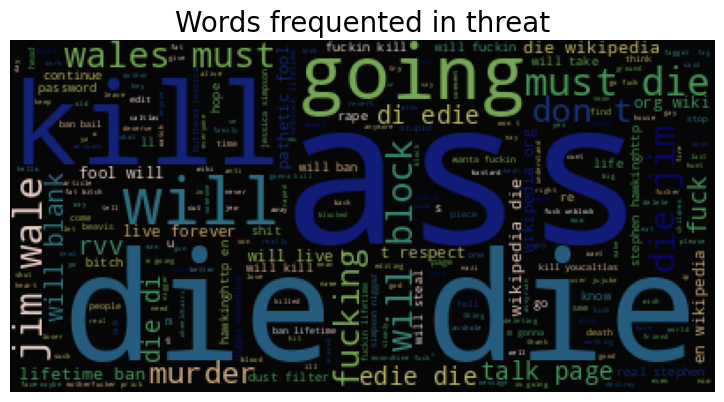

In [ ]:
wordcloud(data_thr,'threat')

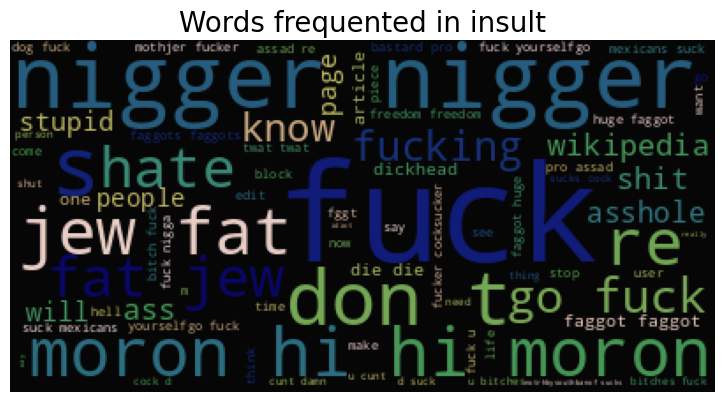

In [ ]:
wordcloud(data_ins,'insult')

Balancing Dataset

In [ ]:
data_tox_1 = data_tox[data_tox['toxic'] == 1].iloc[0:5000,:]
data_tox_0 = data_tox[data_tox['toxic'] == 0].iloc[0:5000,:]
data_tox_done = pd.concat([data_tox_1,data_tox_0],axis =0)
data_tox_done.shape

(10000, 3)

In [ ]:
data_sev[data_sev['severe_toxic']==1].count()
data_sev_1 = data_sev[data_sev['severe_toxic']==1].iloc[0:1595,:]
data_sev_0 = data_sev[data_sev['severe_toxic']==0].iloc[0:1595,:]
data_sev_done = pd.concat([data_sev_1, data_sev_0],axis=0)
data_sev_done.shape

(3190, 3)

In [ ]:
data_obs[data_obs['obscene']==1].count()
data_obs_1 = data_obs[data_obs['obscene']==1].iloc[0:5000,:]
data_obs_0 = data_obs[data_obs['obscene']==0].iloc[0:5000,:]
data_obs_done = pd.concat([data_obs_1,data_obs_0],axis=0)
data_obs_done.shape

(10000, 3)

In [ ]:
data_thr[data_thr['threat']==1].count()
data_thr_1 = data_thr[data_thr['threat']==1].iloc[0:478,:]
data_thr_0 = data_thr[data_thr['threat']==0].iloc[0:1912,:]
data_thr_done = pd.concat([data_thr_1,data_thr_0],axis=0)
data_thr_done.shape

(2390, 3)

In [ ]:
data_ins[data_ins['insult']==1].count()
data_ins_1 = data_ins[data_ins['insult']==1].iloc[0:5000,:]
data_ins_0 = data_ins[data_ins['insult']==0].iloc[0:5000,:]
data_ins_done = pd.concat([data_ins_1,data_ins_0],axis=0)
data_ins_done.shape

(10000, 3)

In [ ]:
data_ide[data_ide['identity_hate']==1].count()
data_ide_1 = data_ide[data_ide['identity_hate']==1].iloc[0:1405,:]
data_ide_0 = data_ide[data_ide['identity_hate']==0].iloc[0:5620,:]
data_ide_done = pd.concat([data_ide_1,data_ide_0],axis=0)
data_ide_done.shape

(7025, 3)

In [ ]:
#Sklearn's model selection module provides various functions to cross-validate our model
#feature_selection module can be used for feature selection/dimensionality reduction on sample sets
#SelectFromModel class for extracting best features of given dataset according to the importance of weights.
#Sklearn train_test_split function helps us create our training data and test data.
# Kfold provides train/test indices to split data in train/test sets
# Cross_val_score is a method which runs cross validation on a dataset to test whether the model can generalise over the whole dataset
# f1_score function of the sklearn. metrics package calculates the F1 score for a set of predicted labels. An F1 score can range between 0 − 1
# precision_score The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
#
# ROC or Receiver Operating Characteristic plot is used to visualise the performance of a binary classifier



Training the models and calculating F1 Scores

In [ ]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
#to split data and evaluate model performance
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import f1_score,precision_score,recall_score,precision_recall_curve,fbeta_score,confusion_matrix
from sklearn.metrics import roc_auc_score , roc_curve
#ML algo
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def cv_tf_train_test(df_done,label,vectorizer,ngram):
  X = df_done.comment_text
  y = df_done[label]
  X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

  cv1 = vectorizer(ngram_range=(ngram),stop_words='english')
  X_train_cv1 = cv1.fit_transform(X_train)
  X_test_cv1 = cv1.transform(X_test)

  #Logistic Regression
  lr = LogisticRegression()
  lr.fit(X_train_cv1,y_train)

  #KNN
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train_cv1,y_train)

  #Bernoulli NB
  bnb = BernoulliNB()
  bnb.fit(X_train_cv1,y_train)

  #Multinomial NB
  mnb = MultinomialNB()
  mnb.fit(X_train_cv1,y_train)

  #SVM
  svm = LinearSVC()
  svm.fit(X_train_cv1,y_train)

  #random forest
  randomforest = RandomForestClassifier(n_estimators=100,random_state=42)
  randomforest.fit(X_train_cv1,y_train)

  f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test) , f1_score(svm.predict(X_test_cv1),y_test),f1_score(randomforest.predict(X_test_cv1),y_test)]}
  df_f1 = pd.DataFrame(f1_score_data , index=['Log Regression','KNN','Bernoulli NB','Multinomial NB','SVM','Random Forest'])

  return df_f1

In [ ]:
import time
#Toxic
t0 = time.time()
df_tox_cv = cv_tf_train_test(data_tox_done , 'toxic', TfidfVectorizer,(1,1))
df_tox_cv.rename(columns={'F1 Score': 'F1 Score(toxic)'},inplace=True)

t1 = time.time()
total = 'Time taken : {} seconds'.format(t1-t0)
print(total)
df_tox_cv



Time taken : 32.0631742477417 seconds


,F1 Score(toxic)
Log Regression,0.861234
KNN,0.173862
Bernoulli NB,0.776521
Multinomial NB,0.874958
SVM,0.876133
Random Forest,0.838055


In [ ]:
# Severe toxic
t0 = time.time()
df_sev_cv = cv_tf_train_test(data_sev_done , 'severe_toxic' , TfidfVectorizer, (1,1))
df_sev_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)
t1 = time.time()
total = 'Time taken : {} seconds'.format(t1-t0)
print(total)
df_sev_cv

Time taken : 4.0031044483184814 seconds


,F1 Score(severe_toxic)
Log Regression,0.927879
KNN,0.857143
Bernoulli NB,0.803707
Multinomial NB,0.936170
SVM,0.926004
Random Forest,0.934874


In [ ]:
# Obscene
t0 = time.time()
df_obs_cv = cv_tf_train_test(data_obs_done , 'obscene' , TfidfVectorizer, (1,1))
df_obs_cv.rename(columns={'F1 Score': 'F1 Score(obscene)' },inplace=True)
t1 = time.time()
total = 'Time taken : {} seconds'.format(t1-t0)
print(total)
df_obs_cv

Time taken : 22.08977961540222 seconds


,F1 Score(obscene)
Log Regression,0.908655
KNN,0.240319
Bernoulli NB,0.787830
Multinomial NB,0.901463
SVM,0.921378
Random Forest,0.909091


In [ ]:
#Insult
t0 = time.time()
df_ins_cv = cv_tf_train_test(data_ins_done , 'insult' , TfidfVectorizer, (1,1))
df_ins_cv.rename(columns={'F1 Score' : 'F1 Score(insult)' },inplace=True)
t1 = time.time()
total = 'Time taken : {} seconds'.format(t1-t0)
print(total)
df_ins_cv

Time taken : 22.105934143066406 seconds


,F1 Score(insult)
Log Regression,0.896599
KNN,0.226307
Bernoulli NB,0.783762
Multinomial NB,0.897411
SVM,0.902619
Random Forest,0.883993


In [ ]:
#Threat
t0 = time.time()
df_thr_cv = cv_tf_train_test(data_thr_done , 'threat' , TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score' : 'F1 Score(threat)' },inplace=True)
t1 = time.time()
total = 'Time taken : {} seconds'.format(t1-t0)
print(total)
df_thr_cv

Time taken : 3.084813117980957 seconds


,F1 Score(threat)
Log Regression,0.628821
KNN,0.720000
Bernoulli NB,0.311828
Multinomial NB,0.504762
SVM,0.786765
Random Forest,0.795539


In [ ]:
#Identity_hate
t0 = time.time()
df_ide_cv = cv_tf_train_test(data_ide_done , 'identity_hate' , TfidfVectorizer, (1,1))
df_ide_cv.rename(columns={'F1 Score' : 'F1 Score(identity_hate)' },inplace=True)
t1 = time.time()
total = 'Time taken : {} seconds'.format(t1-t0)
print(total)
df_ide_cv

Time taken : 13.445512294769287 seconds


,F1 Score(identity_hate)
Log Regression,0.699029
KNN,0.169421
Bernoulli NB,0.549206
Multinomial NB,0.485857
SVM,0.797516
Random Forest,0.768448


In [ ]:
f1_all = pd.concat([df_tox_cv ,df_sev_cv,df_obs_cv,df_ins_cv,df_thr_cv,df_ide_cv] , axis = 1)
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,Bernoulli NB,Multinomial NB,SVM,Random Forest
F1 Score(toxic),0.861234,0.173862,0.776521,0.874958,0.876133,0.838055
F1 Score(severe_toxic),0.927879,0.857143,0.803707,0.936170,0.926004,0.934874
F1 Score(obscene),0.908655,0.240319,0.787830,0.901463,0.921378,0.909091
F1 Score(insult),0.896599,0.226307,0.783762,0.897411,0.902619,0.883993
F1 Score(threat),0.628821,0.720000,0.311828,0.504762,0.786765,0.795539
F1 Score(identity_hate),0.699029,0.169421,0.549206,0.485857,0.797516,0.768448


In [ ]:
X = data_tox_done.comment_text
y = data_tox_done['toxic']

X_train ,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
tfv = TfidfVectorizer(ngram_range=(1,1),stop_words='english')
X_train_fit = tfv.fit_transform(X_train)
print(X_train_fit)
X_test_fit = tfv.transform(X_test)
randomforest = RandomForestClassifier(n_estimators=100,random_state=42)
randomforest.fit(X_train_fit,y_train)
randomforest.predict(X_test_fit)

In [ ]:
comment1 = ['You fucking idiot']
comment2 = ['I am doing good']

comment_vect = tfv.transform(comment1)
randomforest.predict_proba(comment_vect)[:,1]

array([1.])

In [ ]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.11400794])

Pickle model

In [ ]:
import pickle
def pickle_model(df, label):

    X = df.comment_text
    y = df[label]

    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    X_vect = tfv.fit_transform(X)
    with open(r"{}.pkl".format(label + '_vect'), "wb") as f:
        pickle.dump(tfv, f)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_vect, y)
    with open(r"{}.pkl".format(label + '_model'), "wb") as f:
        pickle.dump(randomforest, f)

In [ ]:
datalist = [data_tox_done, data_sev_done, data_obs_done, data_ins_done, data_thr_done, data_ide_done]
label = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']

for i,j in zip(datalist,label):
    pickle_model(i, j)